
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2023**

---
# Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pandasql as pdsql
from typing import List

In [2]:
# Utils
# TODO: Create a module for these functions


def filter_extreme_rows(df: pd.DataFrame, column_list: List[str]):
    """Returns the inputed pandas.DataFrame with the outliers excluded."""
    # Iterate over the columns and filter out the rows with extreme values
    for column in column_list:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

## Lectura del data set

En la notebook 00 se explican los detalles de la siguiente sección.

In [3]:
url = "https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv"
df = pd.read_csv(url)

## Inspección general del data set

In [4]:
# first, we visualize the first 5 rows and the corresponding columns
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [5]:
# then, we look at the number of rows and columns
df.shape

(5358, 44)

In [6]:
# Let us now see the list of columns
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

In [7]:
# Let's check the data types of each column and Non-Null Count.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 44 columns):
 #   Column                                                                           Non-Null Count  Dtype  
---  ------                                                                           --------------  -----  
 0   work_country                                                                     5358 non-null   object 
 1   work_province                                                                    5358 non-null   object 
 2   work_dedication                                                                  5358 non-null   object 
 3   work_contract_type                                                               5358 non-null   object 
 4   salary_monthly_BRUTO                                                             5358 non-null   float64
 5   salary_monthly_NETO                                                              5358 non-null   float64
 6   numero  

In [8]:
# To finish this first inspection of the data, let's look at some
# basic statistics of the numerical columns of the DataFrame
df.describe()

,salary_monthly_BRUTO,salary_monthly_NETO,salary_comparison_last_semester,salary_satisfaction,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?,company_recommended,salary_on_call_duty_charge,profile_age
count,5.358000e+03,5.358000e+03,5358.000000,5358.000000,5358.00000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,1718.000000,5358.000000
mean,3.635105e+05,2.770108e+05,2.639044,2.650616,7.34316,2.746529,2.003686,2.121930,0.617021,6.951848,2206.673690,33.279395
std,5.439255e+05,4.019423e+05,0.875262,0.880582,7.20028,4.491559,3.047915,9.749206,1.115014,2.713072,17389.853287,7.924729
min,0.000000e+00,0.000000e+00,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,1.500000e+05,1.186122e+05,2.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,27.000000
50%,2.560000e+05,2.010000e+05,3.000000,3.000000,5.00000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,32.000000
75%,4.126570e+05,2.940000e+05,3.000000,3.000000,11.00000,3.000000,2.500000,1.000000,1.000000,9.000000,0.000000,38.000000
max,2.800000e+07,1.500000e+07,4.000000,4.000000,45.00000,80.000000,34.000000,270.000000,5.000000,10.000000,450000.000000,74.000000


---

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

## 1.1 Selección de columnas relevantes

Las columnas relevantes van a depender de cuál sea exactamente nuestra pregunta, pero separamos las que pueden estar relacionadas con la relación entre salario y lenguaje de programación:
- `'work_contract_type'`, e.g.: Remoto, Staff, etc.;
- `'Trabajo de'`, posiblemente asociada al lenguaje;
- `'profile_years_experience'`;
- `'work_years_in_company'`;
- `'work_work_modality'`.

In [9]:
df["work_contract_type"].unique()

array(['Staff (planta permanente)', 'Remoto (empresa de otro país)',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Freelance', 'Participación societaria en una cooperativa'],
      dtype=object)

In [10]:
df["Trabajo de"].unique()

array(['Infosec', 'Developer', 'Technical Leader', 'QA / Tester',
       'Sales / Pre-Sales', 'Data Engineer', 'Trainee',
       'SysAdmin / DevOps / SRE', 'Administrador de Infraestructura', '-',
       'HelpDesk', 'BI Analyst / Data Analyst', 'Business Analyst',
       'Designer', 'QA Híbrido (Manual y Automation)', 'Process Analyst',
       'Soporte local nivel 2 y 3', 'Desarrollo y Mantenimiento',
       'Manager / Director', 'Networking', 'Recruiter / HR',
       'Project Manager', 'UX Designer', 'Consultor Atlassian',
       'Analista gestion de cambio', 'Consultant', 'Capacitador',
       'Product Manager', 'MLl engineer', 'Scrum Master', 'Middleware',
       'demand manager / delivery manager',
       'Ing. de software y operaciones', 'Architect', 'Soporte On Site',
       'Data Scientist', 'quantitative dev', 'Help desk + plataformas',
       'mix Consultant - Business Analyst - Technical Leader',
       'Cloud Engineer', 'Product Owner', 'Product Marketing Manager',
       'R

In [11]:
df["profile_years_experience"].unique()

array([10.  ,  2.  ,  1.  ,  6.  ,  3.  ,  0.  , 25.  , 17.  ,  4.  ,
        5.  , 12.  , 20.  , 15.  ,  8.  ,  3.5 , 14.  ,  7.  , 23.  ,
       22.  ,  1.6 , 30.  , 34.  ,  1.5 , 16.  , 11.  ,  9.  ,  2.5 ,
       24.  , 28.  , 35.  , 29.  , 26.  , 13.  , 18.  , 27.  , 21.  ,
       32.  , 45.  , 19.  , 36.  , 33.  ,  4.5 , 31.  , 40.  ,  2.7 ,
        4.6 ,  1.75,  1.9 , 37.  ])

In [12]:
df["work_years_in_company"].unique()

array([ 0.  ,  2.  ,  1.6 ,  1.  , 30.  ,  3.  ,  5.  , 20.  , 10.  ,
       12.  ,  6.  , 11.  ,  9.  , 19.  ,  7.  , 18.  ,  4.  ,  1.5 ,
       17.  , 22.  ,  8.  ,  2.5 ,  1.3 ,  3.9 , 14.  , 24.  , 15.  ,
       16.  ,  3.6 , 13.  , 23.  , 21.  ,  1.4 ,  1.2 ,  1.75,  2.8 ,
       25.  , 26.  ,  7.5 ,  3.5 ,  1.7 , 40.  , 28.  , 34.  ,  2.7 ,
        1.9 , 80.  ,  4.5 , 33.  , 29.  , 27.  ,  0.6 ,  1.8 ])

In [13]:
df["work_work_modality"].unique()

array(['100% remoto', 'Híbrido (presencial y remoto)', '100% presencial'],
      dtype=object)

In [14]:
df["tools_programming_languages"].unique()
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

## 1.2 Selección de filas relevantes

Seleccionamos las filas excluyendo outliers, e incluyendo sólo filas que cumplan con los siguientes criterios:
- `salary_monthly_BRUTO > 10000`
- `salary_monthly_NETO > 10000`
- `salary_monthly_BRUTO > salary_monthly_NETO`

Además, para evitar los casos de un uso altamente específico de un lenguaje de programación (de nicho), filtraremos luego los lenguajes de programación cuya frecuencia absoluta sea mayor a 300 (cota ad hoc).

In [15]:
df = filter_extreme_rows(df, ["salary_monthly_BRUTO", "salary_monthly_NETO"])
df = pdsql.sqldf(
    "SELECT * FROM df WHERE salary_monthly_BRUTO > 10000 AND salary_monthly_NETO > 10000 AND salary_monthly_BRUTO > salary_monthly_NETO"
)

---

### Lenguajes de programación más populares

Notar que respuestas como `'CSS, HTML, Java, Javascript, SQL, TypeScript'` hay que parsearlas antes de poder hacer el conteo de frecuencias. Además, hay que limpiar los espacios en blanco y las diferencias en capitalización.

Luego de hacer esto, realizamos un gráfico de barras con frecuencia descendiente para visualizar los lenguajes más populares.

In [16]:
# Initialize an empty dictionary to store the salary data for each language
language_salary_data = {}

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Convert the value in the 'tools_programming_languages' column to a string, then split it by comma
    languages = str(row["tools_programming_languages"]).lower().split(",")
    # Iterate over each programming language in the list
    for language in languages:
        # Clean the language string by removing leading/trailing spaces
        language = language.strip()
        # Check if the language is already in the dictionary
        if language in language_salary_data:
            # If it is, append the salary to the existing list of salaries for that language
            language_salary_data[language].append(row["salary_monthly_NETO"])
        else:
            # If it is not, create a new key-value pair in the dictionary for the language and its salary data
            language_salary_data[language] = [row["salary_monthly_NETO"]]

# Filter the language salary data dictionary to include only the languages that have more than twenty salary data point
language_salary_data_filtered = {
    language: salaries
    for language, salaries in language_salary_data.items()
    if len(salaries) > 300  # 300 because of reasons (?
}

# Initialize an empty list to store the statistics for each language
language_salary_stats = []

# Iterate over each language in the filtered dictionary
for language in language_salary_data_filtered:
    # Calculate the statistics for the salaries for that language
    salary_stats = [
        language,
        np.mean(language_salary_data_filtered[language]),
        np.median(language_salary_data_filtered[language]),
        np.std(language_salary_data_filtered[language]),
        len(language_salary_data_filtered[language]),
    ]
    # Append the statistics to the list of language statistics
    language_salary_stats.append(salary_stats)

# Create a DataFrame from the list of language statistics and name the columns
df_salary_stats = pd.DataFrame(
    language_salary_stats,
    columns=["Language", "Mean Salary", "Median Salary", "Standard Deviation", "Count"],
)

# Sort the DataFrame by frequency in descending order
df_salary_stats = df_salary_stats.sort_values(by="Count", ascending=False)

# Print the result
df_salary_stats

,Language,Mean Salary,Median Salary,Standard Deviation,Count
6,sql,210959.923092,207000.00,93425.323911,1530
1,javascript,208451.966498,200000.00,95723.364244,1465
4,html,201445.946610,192000.00,90241.531764,1127
0,python,231685.084743,225904.00,99582.343368,993
3,css,195859.526202,183015.00,90046.301419,761
5,java,227066.426544,223352.17,98585.686777,709
8,ninguno de los anteriores,197372.136134,192503.50,90627.585871,626
11,bash/shell,226921.712112,225000.00,95768.447346,606
7,typescript,210432.838856,200000.00,93370.737711,603
9,.net,219575.646523,212000.00,94545.893923,486


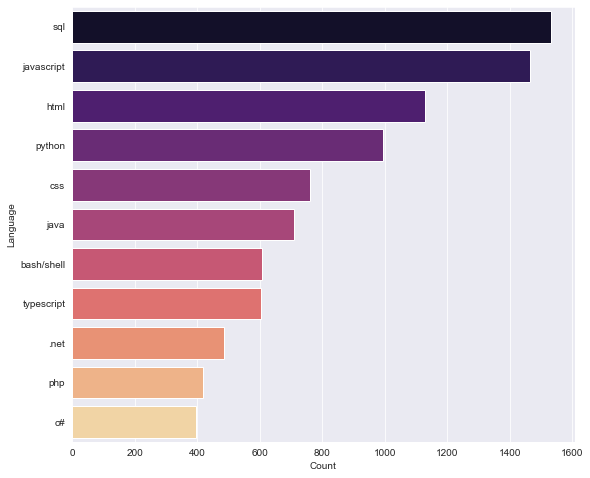

In [17]:
# Style
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))

sns.barplot(
    data=df_salary_stats.query('Language != "ninguno de los anteriores"').sort_values(
        by="Count", ascending=False
    ),
    x="Count",
    y="Language",
    palette="magma",
)
plt.show()

### Primera exploración a la distribución de salarios por lenguaje

Repetimos lo anterior, pero esta vez ordenando según el salario medio por lenguaje, en orden decreciente.

In [18]:
# I sorted by count before to assess popularity, now I sort by mean salary to get closer to our question
df_salary_stats = df_salary_stats.sort_values(by="Mean Salary", ascending=False)
df_salary_stats

,Language,Mean Salary,Median Salary,Standard Deviation,Count
0,python,231685.084743,225904.00,99582.343368,993
5,java,227066.426544,223352.17,98585.686777,709
11,bash/shell,226921.712112,225000.00,95768.447346,606
9,.net,219575.646523,212000.00,94545.893923,486
10,c#,211244.722051,207000.00,91059.077826,395
6,sql,210959.923092,207000.00,93425.323911,1530
7,typescript,210432.838856,200000.00,93370.737711,603
2,php,210070.690431,200000.00,92010.706513,418
1,javascript,208451.966498,200000.00,95723.364244,1465
4,html,201445.946610,192000.00,90241.531764,1127


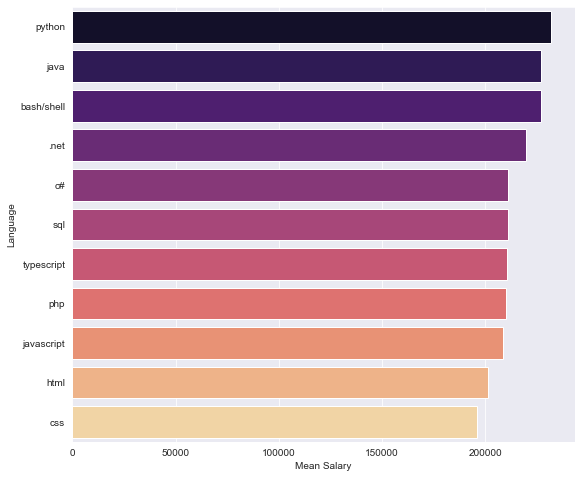

In [19]:
# Style
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))

sns.barplot(
    data=df_salary_stats.query('Language != "ninguno de los anteriores"'),
    x="Mean Salary",
    y="Language",
    palette="magma",
)
plt.show()
# for the record, the following doesn't work
# errorbar=df_salary_stats['Standard Deviation']

Notar que, debido a que en general los programadores saben más de un lenguaje, el gráfico anterior no indica de manera directa qué lenguajes son mejores pagos. Un lenguaje podría tener una media de salario alta debido a su aparición conjunta con otro lenguaje altamente remunerado. Esta relación podría ser causal, caso en el que el lenguaje genuinamente tendría una correlación con un salario más alto, o casual, y deberíamos contrastar con nueva información (o con un subconjunto de testeo del data set inicial) para distinguir entre ambas situaciones.

Otra posibilidad, es que haya una correlación entre saber dos lenguajes que no sea causal ni casual. Saber uno no influye en saber el otro, pero, e.g., a los programadores que usan un lenguaje les suele gustar también el otro. En este caso, si uno de ellos es bien pagado en el mercado y el otro no, ambos correlacionarán con salarios más altos, pero mientras que saber uno de ellos causaría, en principio, que uno gane más, el saber el otro no, y simplemente podrá usarse como un indicador que correlaciona con salarios más altos.

### Número de lenguajes por programador

Una pregunta relacionada a lo anterior, es si el número de lenguajes que un programador sabe influye en su salario, independientemente de cuáles sean estos. Para evaluar esto, comenzamos graficando el histograma de frecuencias para el número de lenguajes por programador.

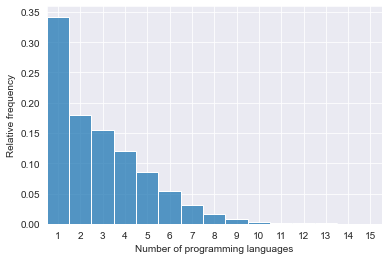

In [20]:
# Count the number of programming languages for each respondent
languages_per_programmer = (
    df["tools_programming_languages"]
    .fillna("")
    .str.split(",")
    .apply(lambda x: len([str(lang).strip() for lang in x]))
)

# Plot the distribution of the number of programming languages per programmer as a histogram
sns.histplot(
    languages_per_programmer, bins=range(1, 16), discrete=True, stat="probability"
)
plt.xticks(range(1, 16))
plt.xlabel("Number of programming languages")
plt.ylabel("Relative frequency")
plt.xlim(0.5, 15.5)
plt.show()

Como podemos observar, el número de lenguajes sigue de manera aproximada una distribución que parece corresponder a una ley de potencias. Veamos ahora el salario medio en función del número de lenguajes.

In [ ]:
# Define the data
languages_per_programmer = (
    df["tools_programming_languages"]
    .fillna("")
    .str.split(",")
    .apply(lambda x: len([str(lang).strip() for lang in x]))
)
salary = df["salary_monthly_NETO"]

# Combine the data into a new dataframe
data = pd.concat([languages_per_programmer, salary], axis=1)

# Filter out entries with more than 15 programming languages
data = data[data["tools_programming_languages"] <= 15]

# Calculate the mean salary and standard deviation for each number of programming languages
mean_salary = data.groupby("tools_programming_languages").mean().reset_index()
std_salary = data.groupby("tools_programming_languages").std().reset_index()

# Create the plot with error bars
sns.barplot(
    x="tools_programming_languages",
    y="salary_monthly_NETO",
    data=data,
    palette="magma",
    errorbar="se",
)

# I'm setting the inferior limit to zero, since error bars get to negative values cause thery are taken symmetric
plt.ylim(0, 500000)

# Set the axis labels and title
plt.xlabel("Number of programming languages")
plt.ylabel("Monthly net salary (ARS)")
plt.title("Salary vs number of programming languages")
plt.show()

Esto parece indicar un ligero aumento de la media salarial a medida que el programador sabe un mayor número de lenguajes. Sin embargo, disponemos de pocos datos para los números de lenguajes por programador más altos.

### Correlación entre el salario y los años de experiencia / en la compañía

Para ver hasta qué punto las columnas `profile_years_experience` y `work_years_in_company`, que supusimos podían relacionarse con el salario, lo están, hacemos los gráficos de pares entre estas y la columna `salary_monthly_NETO`. Además, calculamos la matriz de correlación, y luego la visualizamos como un mapa de calor.

In [21]:
relevant_columns = [
    "tools_programming_languages",
    "salary_monthly_NETO",
    "work_contract_type",
    "Trabajo de",
    "profile_years_experience",
    "work_years_in_company",
    "work_work_modality",
]

In [22]:
df1 = df[relevant_columns]

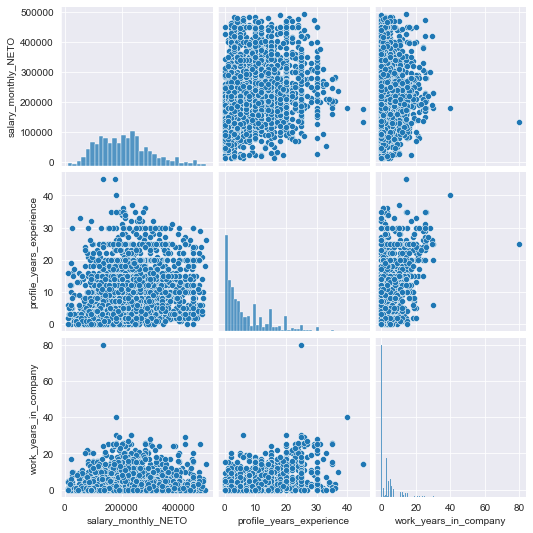

In [23]:
sns.pairplot(data=df1)
plt.show()

In [24]:
columns_to_correlate = [
    "salary_monthly_NETO",
    "profile_years_experience",
    "work_years_in_company",
]
df_corr = df[columns_to_correlate].dropna().corr()
df_corr

,salary_monthly_NETO,profile_years_experience,work_years_in_company
salary_monthly_NETO,1.000000,0.376955,0.119056
profile_years_experience,0.376955,1.000000,0.491643
work_years_in_company,0.119056,0.491643,1.000000


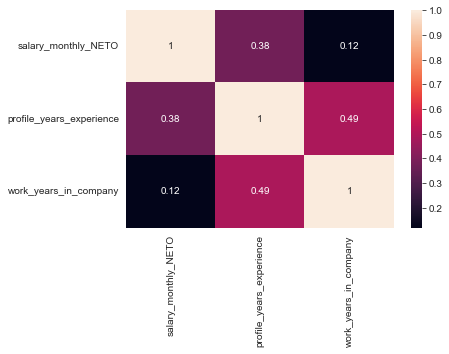

In [25]:
# heatmap to better visualize this
sns.heatmap(df_corr, annot=True)
plt.show()

En los gráficos de pares, el segundo y tercer gráfico de la primera fila nos muestran que, para los valores de años que tenemos registrados, los datos se esparcen a lo largo del eje de salario neto, sin mostrar ninguna tendencia aparente. Esto es corroborado luego por los bajos valores de la matriz de correlación que corresponden a estos gráficos. Esto nos indica que en principio no sería necesario tener en cuenta estas columnas a la hora de evaluar el lenguaje mejor pago.

### Visualización más detallada de la distribución de salarios por lenguaje

Para tener una mejor idea de la distribución de salarios por lenguaje que simplemente la distribución de las medias, visualizamos a la misma en diversas formas, para poder elegir el gráfico que mejor comunique (a ser presentado como respuesta al punto 3 en la sección siguiente). A estos gráficos, los realizamos ordenando los lenguajes en orden de media salarial decreciente de arriba hacia abajo.

In [26]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
    if not isinstance(languages_str, str):
        return []
    # Remove 'other' option
    languages_str = languages_str.lower().replace("ninguno de los anteriores", "")
    # Split string into list of items
    # Remove spaces and commas for each item
    return [lang.strip().replace(",", "") for lang in languages_str.split()]


# Create a new column with the list of languages
df.loc[:, "cured_programming_languages"] = df.tools_programming_languages.apply(
    split_languages
)
if "cured_programming_languages" not in relevant_columns:
    relevant_columns.append("cured_programming_languages")

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = (
    df.cured_programming_languages.apply(pd.Series)
    .stack()
    .reset_index(level=-1, drop=True)
    .to_frame()
    .join(df[relevant_columns])
    .rename(columns={0: "programming_language"})
)
# Horrible programming style! But a lot of data science code can be written
# as a concatenation of functions (pipelines), and there's no elegant way of
# doing that on Python.
# df_lang[:5]

In [27]:
language_count = (
    df_lang.programming_language.value_counts()
    .reset_index()
    .rename(columns={"index": "language", "programming_language": "frequency"})
)
# language_count[:10]
# En la columna `programming_language` se encuentra cada lenguaje por separado.
# Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`,
# la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

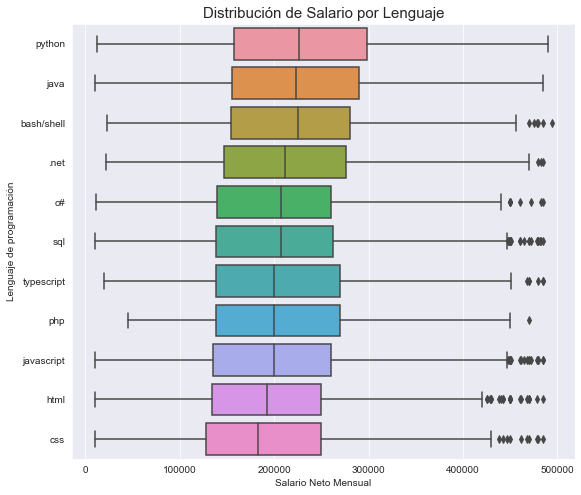

In [28]:
df_lang_for_box_plot = df_lang.drop(
    columns=["cured_programming_languages"], inplace=False
)
query = """
SELECT df_lang_for_box_plot.programming_language, salary_monthly_NETO, language_count.frequency, language_salary.avg_salary
FROM df_lang_for_box_plot
LEFT JOIN
(
  SELECT programming_language, COUNT(*) AS frequency
  FROM df_lang_for_box_plot
  GROUP BY programming_language
  HAVING frequency > 300
) AS language_count ON language_count.programming_language = df_lang_for_box_plot.programming_language
LEFT JOIN
(
  SELECT programming_language, AVG(salary_monthly_NETO) AS avg_salary
  FROM df_lang_for_box_plot
  GROUP BY programming_language
) AS language_salary ON language_salary.programming_language = df_lang_for_box_plot.programming_language
WHERE frequency IS NOT NULL
ORDER BY avg_salary DESC
"""

df_lang_for_box_plot = pdsql.sqldf(query)

sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))

ax = sns.boxplot(
    y=df_lang_for_box_plot["programming_language"],
    x=df_lang_for_box_plot["salary_monthly_NETO"],
)
ax.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax.set_title("Distribución de Salario por Lenguaje", fontsize=15)
plt.show()

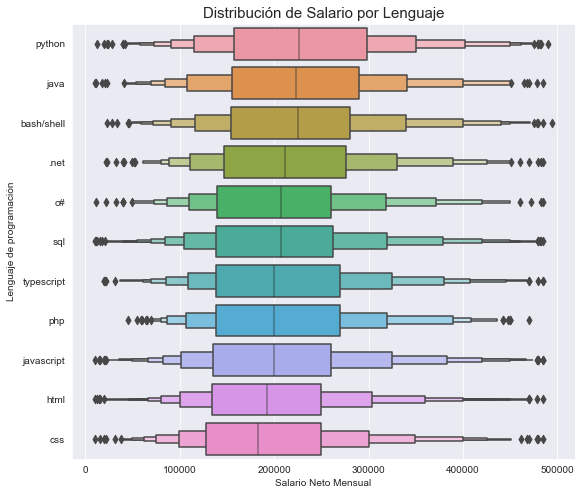

In [29]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))

ax_to_present = sns.boxenplot(
    y=df_lang_for_box_plot["programming_language"],
    x=df_lang_for_box_plot["salary_monthly_NETO"],
)
ax_to_present.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax_to_present.set_title("Distribución de Salario por Lenguaje", fontsize=15)
plt.show()

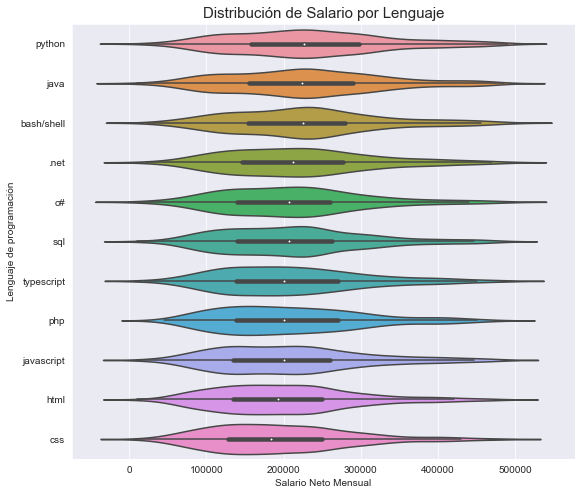

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))

ax = sns.violinplot(
    y=df_lang_for_box_plot["programming_language"],
    x=df_lang_for_box_plot["salary_monthly_NETO"],
)
ax.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax.set_title("Distribución de Salario por Lenguaje", fontsize=15)
plt.show()

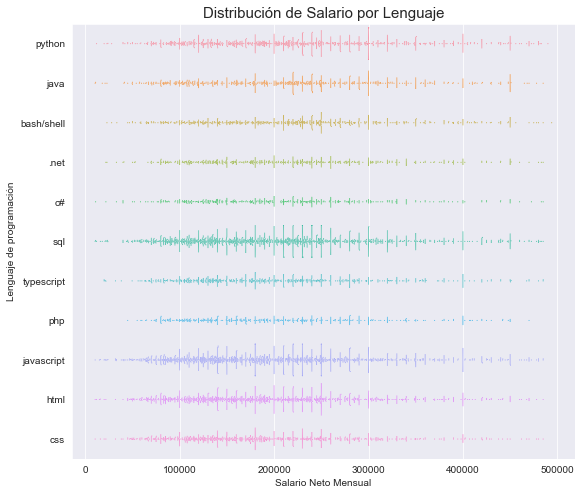

In [31]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))
ax = sns.swarmplot(
    y=df_lang_for_box_plot["programming_language"],
    x=df_lang_for_box_plot["salary_monthly_NETO"],
    size=1,
)
ax.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax.set_title("Distribución de Salario por Lenguaje", fontsize=15)
plt.show()

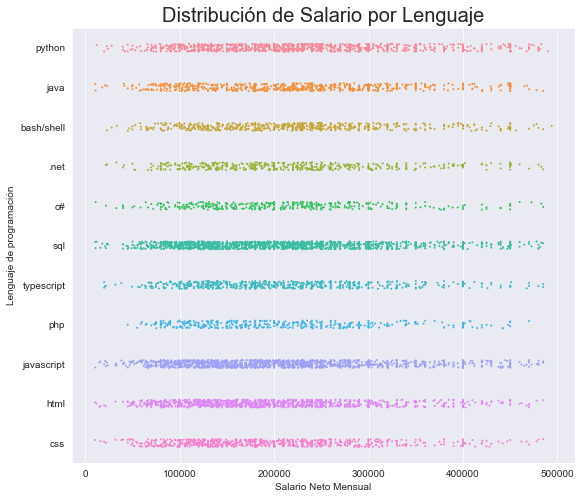

In [32]:
sns.set_style("darkgrid")
plt.figure(figsize=(9, 8))
ax = sns.stripplot(
    y=df_lang_for_box_plot["programming_language"],
    x=df_lang_for_box_plot["salary_monthly_NETO"],
    size=2,
)
ax.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax.set_title("Distribución de Salario por Lenguaje", fontsize=20)
plt.show()

## 1.3 Visualización de las distribuciones de salario para cada lenguaje

El siguiente gráfico, compara las distribuciones de salario para los lenguajes que cuentan con más de 300 programadores encuestados, exculyendo outliers (de la distribución original) y donde el salario neto es mayor a $10000, ordenados de modo que el salario medio decrece de arriba hacia abajo.

*Nota: Elegimos realizar un boxenplot, ya que consideramos que representa un punto intermedio entre un boxplot, que es simple pero no permite visualizar demasiada información (en particular para data sets grandes como este, se pierde el detalle de las colas de la distribución), y, e.g., un swarmplot, que brinda mucha información pero conlleva un aumento importante en complejidad.*

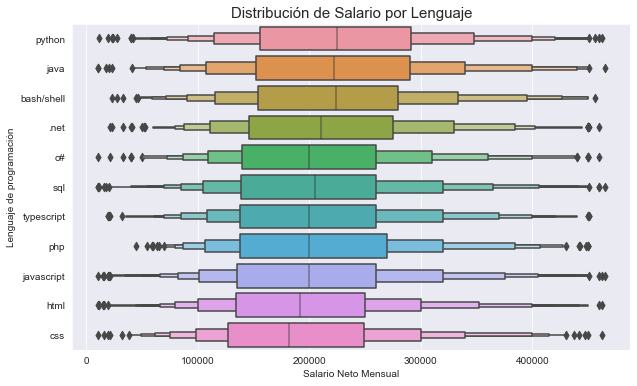

In [33]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

df3_filtered = filter_extreme_rows(df_lang_for_box_plot, ["salary_monthly_NETO"])
ax_to_present = sns.boxenplot(
    y=df3_filtered["programming_language"],
    x=df3_filtered["salary_monthly_NETO"],
)
ax_to_present.set(xlabel="Salario Neto Mensual", ylabel="Lenguaje de programación")
ax_to_present.set_title("Distribución de Salario por Lenguaje", fontsize=15)
plt.show()

## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [34]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["python", "go"]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
# filtered_df_lang[:5]

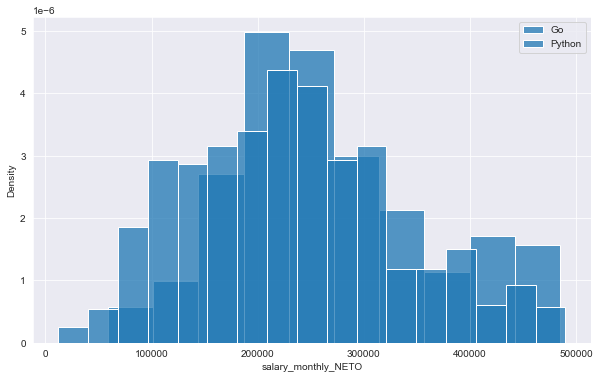

In [35]:
python_languages = ["python"]
python_df_lang = df_lang[df_lang.programming_language.isin(python_languages)]

go_languages = ["go"]
go_df_lang = df_lang[df_lang.programming_language.isin(go_languages)]


# sns.histplot(data=filtered_df_lang, x='salary_monthly_NETO', hue='programming_language', stat='density')
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.histplot(data=go_df_lang, x="salary_monthly_NETO", label="Go", stat="density")
sns.histplot(
    data=python_df_lang, x="salary_monthly_NETO", label="Python", stat="density"
)
ax_to_present.set(xlabel="Salario Neto Mensual", ylabel="Density")
ax_to_present.set_title("Distribución de Salarios: Python vs Go", fontsize=15)
plt.legend()
plt.show()

Claramente es la cola ancha de la distribución lo que le da la ventaja a Go. A simple vista, la distribución para Go parece tener un sesgo menor que la de Python. Corroboremos esto.

In [36]:
# calculate the median of the salaries
python_median_salary = python_df_lang["salary_monthly_NETO"].median()
go_median_salary = go_df_lang["salary_monthly_NETO"].median()

# calculate the bias
python_bias = abs(python_df_lang["salary_monthly_NETO"] - python_median_salary).mean()
go_bias = abs(go_df_lang["salary_monthly_NETO"] - go_median_salary).mean()

print("Python: \n")
print("Median salary:", python_median_salary)
print("Bias:", python_bias)
print("\nGo: \n")
print("Median salary:", go_median_salary)
print("Bias:", go_bias)

Python: 

Median salary: 225904.0
Bias: 79779.85352467271

Go: 

Median salary: 248000.0
Bias: 75448.83769696968


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




### Respuesta:
Como **herramientas visuales** para estudiar la distribucion y comportamiento de los datos se pueden usar boxplots, histogramas, diagramas de dispersion o relieve, heatmaps, etc. en funcion de lo que se busque analizar.
Los **modelos** nos sirven como herramientas matematicas para realizar inferencias o sacar conclusiones, un ejemplo son las **Medidas de tendencia central**: media, mediana, moda; y las **Dedidas de Dispersion** como la desviación estándar, la varianza, y el coeficiente de variación.

Para elegir tres variables numericas, buscamos a continuacion entre todas las variables numericas relevantes, 
cuales son las que nos pueden ser de mayor utilidad. Para esto usamos un diagrama de correlacion.

In [37]:
columns_to_correlate = [
    "salary_monthly_NETO",
    "profile_years_experience",
    "work_years_in_company",
    "work_years_in_current_position",
    "profile_age",
    "salary_monthly_BRUTO",
]
df_corr = df[columns_to_correlate].dropna().corr()
df_corr

,salary_monthly_NETO,profile_years_experience,work_years_in_company,work_years_in_current_position,profile_age,salary_monthly_BRUTO
salary_monthly_NETO,1.000000,0.376955,0.119056,0.115830,0.293613,0.940585
profile_years_experience,0.376955,1.000000,0.491643,0.478260,0.738658,0.390354
work_years_in_company,0.119056,0.491643,1.000000,0.663999,0.427790,0.135378
work_years_in_current_position,0.115830,0.478260,0.663999,1.000000,0.381410,0.110083
profile_age,0.293613,0.738658,0.427790,0.381410,1.000000,0.293337
salary_monthly_BRUTO,0.940585,0.390354,0.135378,0.110083,0.293337,1.000000


Estas columnas ya fueron limpiadas en el punto 1, seleccionando las filas excluyendo outliers, e incluyendo sólo filas que cumplan con los siguientes criterios:
- `salary_monthly_BRUTO > 10000`
- `salary_monthly_NETO > 10000`
- `salary_monthly_BRUTO > salary_monthly_NETO`

El diagrama de correlacion obtenido es el siguiente:

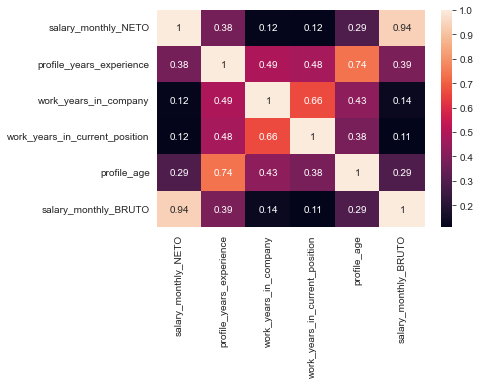

In [38]:
# heatmap to better visualize this
sns.heatmap(df_corr, annot=True)
plt.show()

 Basandonos en el mapa anterior, elegimos como **variables numericas** las siguientes:
- `'salary_monthly_NETO'`, se quere estudiar las diferencias de ganancia neta entre trabajos remotos y presenciales.
- `'profile_years_experience'`, se eligió porque es la varaible aleatoria que tiene correlacion mas fuerte con `'salary_monthly_NETO'`.
- `'work_years_in_current_position'`, se eligio porque es la variable aleatoria de menor correlacion con `'profile_years_experience'`. 


Como **variables categoricas** elegimos: 
   - `'work_work_modality'`
   - `'work_province'`   

A continuacion se trabaja en el dataframe con las columnas elegidas.

In [39]:
relevant_columns = [
    "work_province",
    "work_work_modality",
    "salary_monthly_NETO",
    "profile_years_experience",
    "work_years_in_current_position",
]

In [40]:
df1 = df[relevant_columns]

Usamos diagramas de dispersion para visualizar como se comportan las variables numericas elegidas.

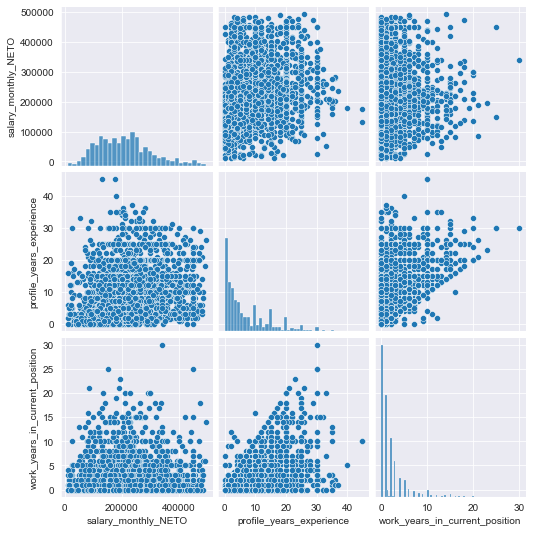

In [41]:
sns.pairplot(data=df1)
plt.show()

Se separa el dataframe en tres dataframes diferentes por cada modalidad de trabajo, con el objetivo de estudiarlas por separado, empleando histogramas para visualizar la distribucion de salarios. Se incluyen sus medias y medianas.

In [42]:
salary_col = "salary_monthly_NETO"
modalidad_col = "work_work_modality"

df_remoto = df[df[modalidad_col] == "100% remoto"]
df_presencial = df[df[modalidad_col] == "100% presencial"]
df_hibrido = df[df[modalidad_col] == "Híbrido (presencial y remoto)"]
df_remoto.head(4)

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender,cured_programming_languages
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,1,None,None,None,...,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,None,None,None,NaN,None,35,Varón Cis,[python]
1,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,1,None,None,None,...,None,None,None,None,None,NaN,None,27,Varón Cis,"[javascript, php, python]"
2,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,1,None,None,None,...,None,None,None,None,None,NaN,None,32,Varón Cis,"[css, html, javascript]"
3,Argentina,Chaco,Full-Time,Staff (planta permanente),633000.0,395000.0,1,Cobro parte del salario en dólares,None,None,...,Licenciatura en Sistemas de Información,UNNE - Universidad Nacional Del Nordeste,None,None,None,NaN,None,31,Varón Cis,"[go, java]"


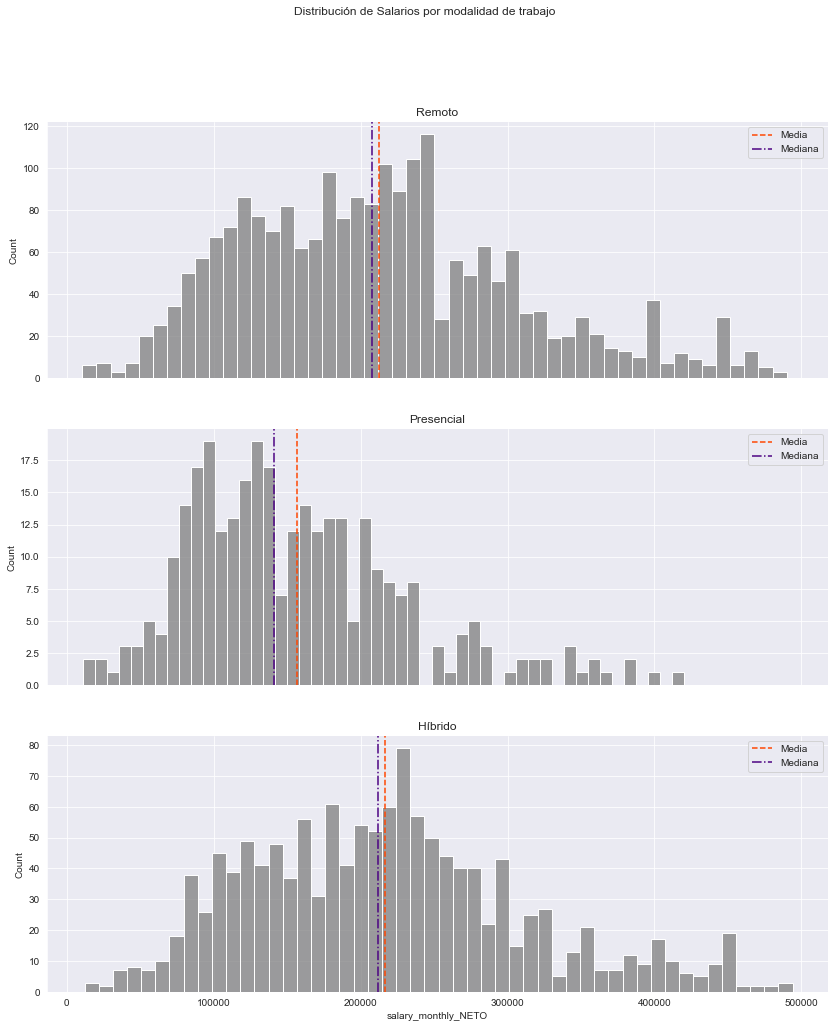

In [43]:
def format_ax(ax, df, col, title, colors):
    ax.axvline(df[col].mean(), color=colors[0], linestyle="--", label="Media")
    ax.axvline(df[col].median(), color=colors[1], linestyle="-.", label="Mediana")
    ax.legend(loc=0)
    ax.set_title(title)


fig, axes = plt.subplots(
    nrows=3, figsize=(14, 16), sharex=True
)  # se genera la figura, se divide en dos lugares y se define su tamaño
fig.suptitle("Distribución de Salarios por modalidad de trabajo")

sns.histplot(
    df_remoto[salary_col], bins=50, ax=axes[0], color="gray"
)  # Histograma con 100 bins
format_ax(axes[0], df_remoto, salary_col, "Remoto", ("orangered", "indigo"))

# filtered_df = df[df[salary_col] < 200000]
sns.histplot(df_presencial[salary_col], bins=50, ax=axes[1], color="gray")
format_ax(axes[1], df_presencial, salary_col, "Presencial", ("orangered", "indigo"))

sns.histplot(df_hibrido[salary_col], bins=50, ax=axes[2], color="gray")
format_ax(axes[2], df_hibrido, salary_col, "Híbrido", ("orangered", "indigo"))


sns.despine()

Se observa que la media y la mediana de los trabajos presenciales son menores a las de los trabajos remotos e hibridos.
En los siguientes graficos podemos observar como se distribuyen los salarios en funcion de mas de una variable aleatoria. 

Nota: Usamos la paleta de colores "magma" porque es una paleta cuyos colores pueden ser distinguidos por gente con problemas
de vision tales como el daltonismo.

<Figure size 720x576 with 0 Axes>

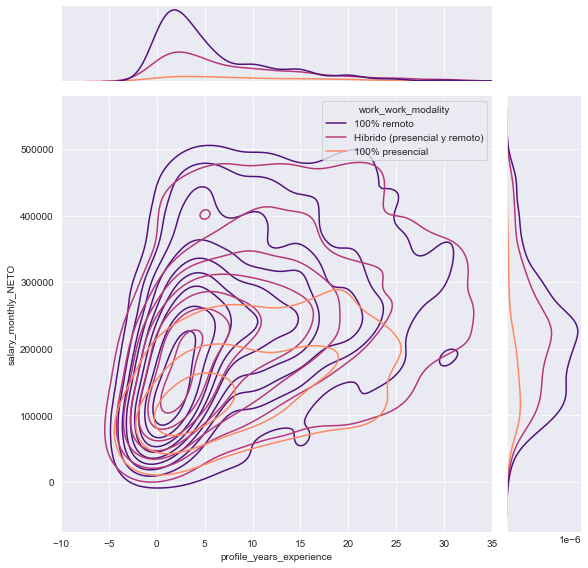

In [44]:
plt.figure(figsize=(10, 8))
JG1 = sns.jointplot(
    data=df,
    x="profile_years_experience",
    y="salary_monthly_NETO",
    hue="work_work_modality",
    palette="magma",
    kind="kde",
    height=8,
)
JG1.ax_joint.set_xlim(-10, 35)
plt.show()

<Figure size 720x576 with 0 Axes>

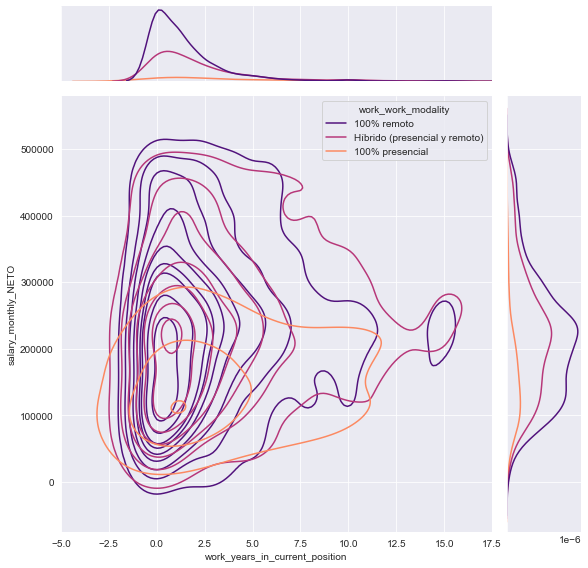

In [45]:
plt.figure(figsize=(10, 8))
JG2 = sns.jointplot(
    data=df,
    x="work_years_in_current_position",
    y="salary_monthly_NETO",
    hue="work_work_modality",
    palette="magma",
    kind="kde",
    height=8,
)
JG2.ax_joint.set_xlim(-5, 17.5)
plt.show()

Vemos nuevamente que salarios de los trabajos presenciales estan "por debajo" que el de las otras modalidades.
Continuando, añadimos al analisis la provincia donde se trabaja. En el siguiente heatmap 
se puede visualizar cuantas personas trabajan en cada modalidad de trabajo por provincia.

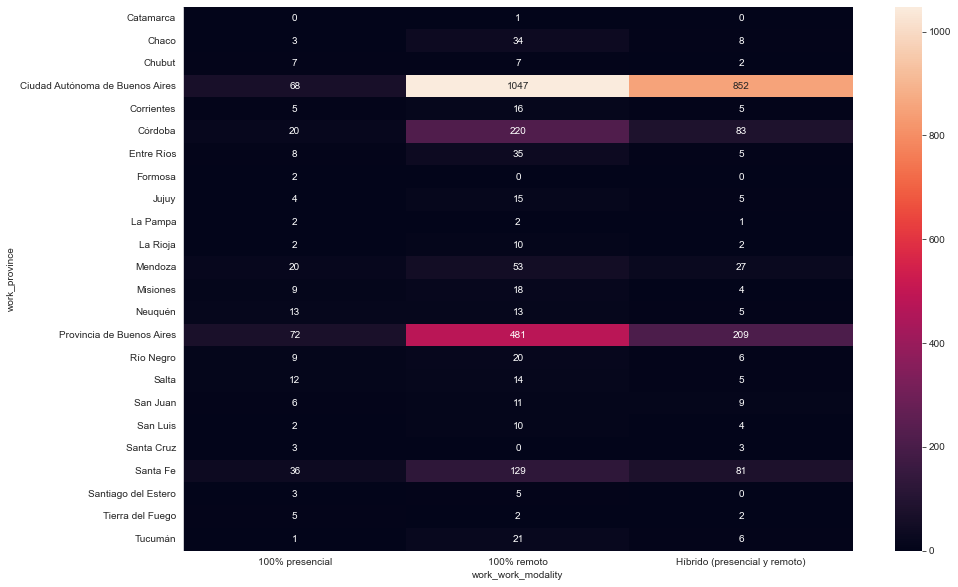

In [46]:
fig = plt.figure(figsize=(15, 10))
exp = pd.crosstab(df.work_province, df.work_work_modality)
sns.heatmap(exp, annot=True, fmt="g")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
sns.despine()

vemos que es en general es menos la gente que trabaja de manera presencial que de manera remota, en especial en provincias como
Buenos Aires, Ciudad Autonoma de Buenos Aires, Cordoba y Santa Fe.

Y ahora podemos repetimos los mismos graficos pero por provincia, esta vez usando diagramas de dispersion en lugar de mapas de relieve, ademas como ejemplo elegimos la Ciudad Autónoma de Buenos Aires.

<Figure size 720x576 with 0 Axes>

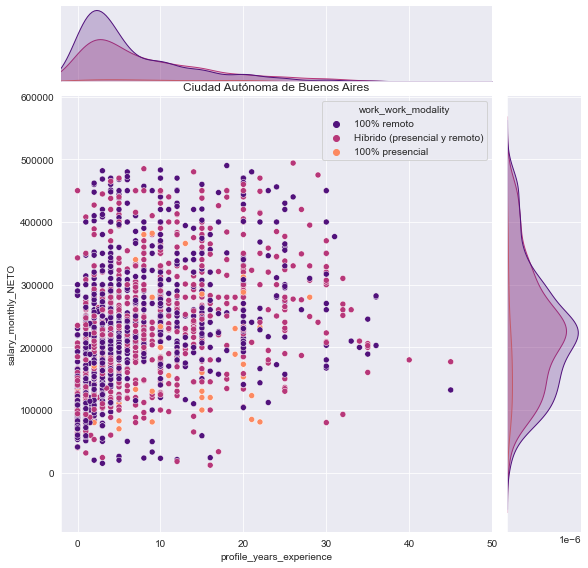

In [47]:
plt.figure(figsize=(10, 8))
df_ciudad_autonoma = df[df["work_province"] == "Ciudad Autónoma de Buenos Aires"]
JG3 = sns.jointplot(
    data=df_ciudad_autonoma,
    x="profile_years_experience",
    y="salary_monthly_NETO",
    hue="work_work_modality",
    palette="magma",
    kind="scatter",
    height=8,
)
JG3.ax_joint.set_xlim(-2, 50)
JG3.ax_joint.set_title("Ciudad Autónoma de Buenos Aires")
plt.show()

<Figure size 1440x1440 with 0 Axes>

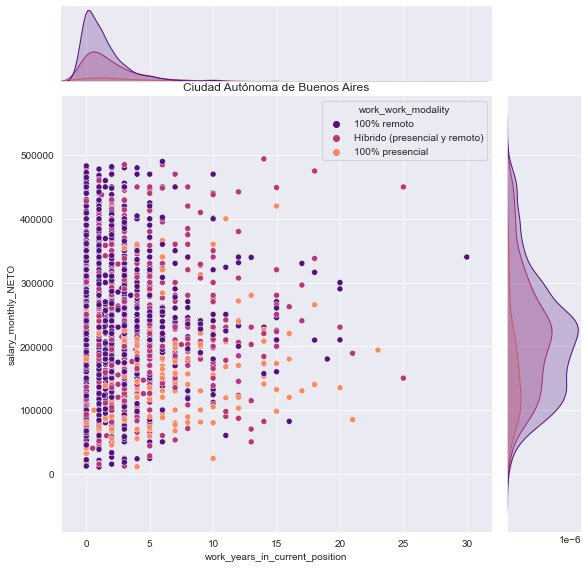

In [48]:
plt.figure(figsize=(20, 20))
JG4 = sns.jointplot(
    data=df,
    x="work_years_in_current_position",
    y="salary_monthly_NETO",
    hue="work_work_modality",
    palette="magma",
    kind="scatter",
    height=8,
    # ratio=2,
)

JG4.ax_joint.set_xlim(-2, 32)
JG4.ax_joint.set_title("Ciudad Autónoma de Buenos Aires")
plt.show()

Si bien estamos limitados en la cantidad de muestras de gente que trabaja de manera presencial, se puede notar nuevamente la tendencia observada anteriormente, donde el trabajo remoto e hibrido son mejor pagos.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Para responder está pregunta, es útil visualizar las variables en un diagrama de dispersión,
y calcular el coeficiente de correlación de estas variables.

The correlation coefficient is 0.94


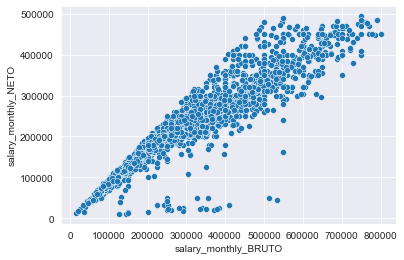

In [49]:
sns.scatterplot(x="salary_monthly_BRUTO", y="salary_monthly_NETO", data=df)


corr_coef = np.corrcoef(df["salary_monthly_BRUTO"], df["salary_monthly_NETO"])
print(f"The correlation coefficient is {corr_coef[0,1]:.2f}")

plt.show()

Hay una correlación lineal positiva muy fuerte, por lo que concluímos que la columna _salary\_monthly\_bruto_ no aporta información útil para éste análisis que no esté contenida en la variable _salary\_monthly\_neto_.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Nos fijamos cuales son los niveles de estudios del dataframe.

In [50]:
nivel_estudios = df["profile_studies_level"].unique()
print(nivel_estudios)

['Universitario' None 'Terciario' 'Secundario' 'Posgrado/Especialización'
 'Maestría' 'Doctorado' 'Posdoctorado']


Encontramos las subpoblaciones con mayor cantidad de datos.

In [51]:
counts = df["profile_studies_level"].value_counts()
top_two = counts.head(2)
top_two

Universitario    1291
Terciario         326
Name: profile_studies_level, dtype: int64

Filtramos el Dataframe

In [52]:
Uni_o_Ter = (df["profile_studies_level"] == "Universitario") | (
    df["profile_studies_level"] == "Terciario"
)


df_Uni_o_Ter = df.loc[Uni_o_Ter]

Calculamos las medidas de centralizacion y dispersion para ambas subpoblaciones.

In [53]:
df_Uni_o_Ter[df_Uni_o_Ter["profile_studies_level"] == "Universitario"][
    "salary_monthly_NETO"
].describe()

count      1291.000000
mean     206651.427483
std       92714.950492
min       12000.000000
25%      135000.000000
50%      200000.000000
75%      260000.000000
max      494000.000000
Name: salary_monthly_NETO, dtype: float64

In [54]:
df_Uni_o_Ter[df_Uni_o_Ter["profile_studies_level"] == "Terciario"][
    "salary_monthly_NETO"
].describe()

count       326.000000
mean     183395.759233
std       91540.646129
min       23000.000000
25%      118146.562500
50%      169718.750000
75%      230000.000000
max      460000.000000
Name: salary_monthly_NETO, dtype: float64

A continuacion comparamos los histogramas de ambas variables. 

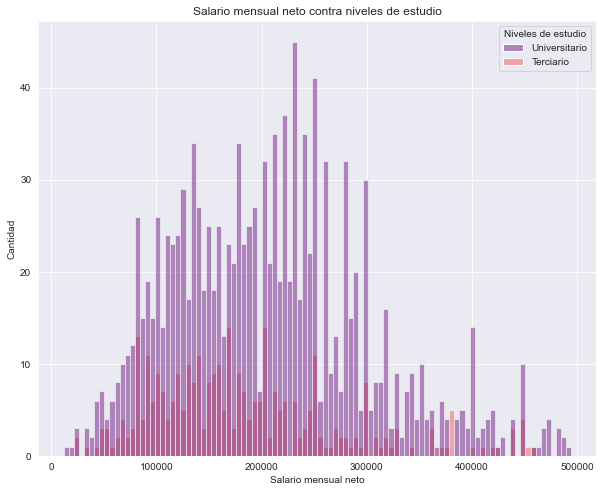

In [55]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(
    data=df_Uni_o_Ter,
    x="salary_monthly_NETO",
    bins=100,
    hue="profile_studies_level",
    palette="magma",
    legend=True,
)
ax.set(xlabel="Salario mensual neto", ylabel="Cantidad")
ax.set_title("Salario mensual neto contra niveles de estudio")
ax.get_legend().set_title("Niveles de estudio")

Como un histograma no es un diagrama de densidad, optamos por hacer boxplots, que permiten una comparacion mas directa de las medidas de dispersion y centralizacion.

Text(0.5, 1.0, 'Salario mensual neto contra niveles de estudio')

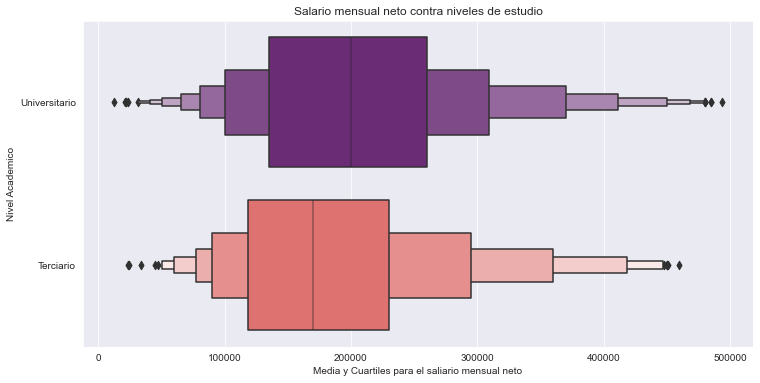

In [56]:
plt.figure(figsize=(12, 6))
ax = sns.boxenplot(
    data=df_Uni_o_Ter,
    x="salary_monthly_NETO",
    y="profile_studies_level",
    palette="magma",
)

ax.set(
    xlabel="Media y Cuartiles para el saliario mensual neto", ylabel="Nivel Academico"
)
ax.set_title("Salario mensual neto contra niveles de estudio")

In [57]:
print(
    df_Uni_o_Ter[df_Uni_o_Ter["profile_studies_level"] == "Terciario"][
        "salary_monthly_NETO"
    ].mean()
)
print(
    df_Uni_o_Ter[df_Uni_o_Ter["profile_studies_level"] == "Universitario"][
        "salary_monthly_NETO"
    ].mean()
)

183395.75923312886
206651.42748257166


Notar que las variables no son independientes dado que a mas formacion academica la media del salario neto aumenta. Cabe mencionar que el analisis hasta aqui realizado, se hizo analizando el nivel academico sin tener en cuenta si fue finalizado o no. Por eso, a continuacion realizamos el mismo analisis pero contemplando solo las personas que finalizaron ese nivel academico. 

In [58]:
Uni_o_Ter_Comp = (
    (
        (df["profile_studies_level"] == "Universitario")
        | (df["profile_studies_level"] == "Terciario")
    )
) & (
    df["profile_studies_level_state"] == "Completo"
)  # only completed studies levels remains.

df_Uni_o_Ter_Comp = df.loc[Uni_o_Ter_Comp]

Calculamos las medidas de centralizacion y dispersion nuevamente.

In [59]:
df_Uni_o_Ter_Comp[df_Uni_o_Ter_Comp["profile_studies_level"] == "Universitario"][
    "salary_monthly_NETO"
].describe()

count       461.000000
mean     233313.560607
std       94947.625543
min       21000.000000
25%      169600.000000
50%      221000.000000
75%      291000.000000
max      480000.000000
Name: salary_monthly_NETO, dtype: float64

In [60]:
df_Uni_o_Ter_Comp[df_Uni_o_Ter_Comp["profile_studies_level"] == "Terciario"][
    "salary_monthly_NETO"
].describe()

count       166.000000
mean     198994.925964
std       89366.371408
min       33479.000000
25%      137129.500000
50%      181742.000000
75%      245000.000000
max      451000.000000
Name: salary_monthly_NETO, dtype: float64

y nuevamente realizamos la comparacion de histogramas.

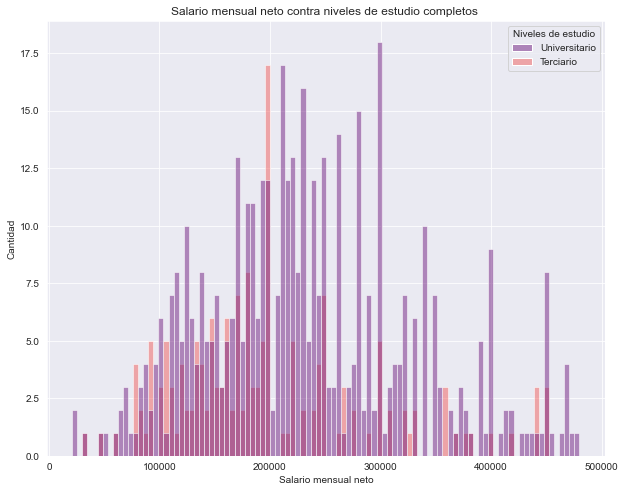

In [61]:
plt.figure(figsize=(10, 8))
ax = sns.histplot(
    data=df_Uni_o_Ter_Comp,
    x="salary_monthly_NETO",
    bins=100,
    hue="profile_studies_level",
    palette="magma",
    legend=True,
)
ax.set(xlabel="Salario mensual neto", ylabel="Cantidad")
ax.set_title("Salario mensual neto contra niveles de estudio completos ")
ax.get_legend().set_title("Niveles de estudio")

A continuacion los boxplots. 

Text(0.5, 1.0, 'Salario mensual neto contra niveles de estudio completos')

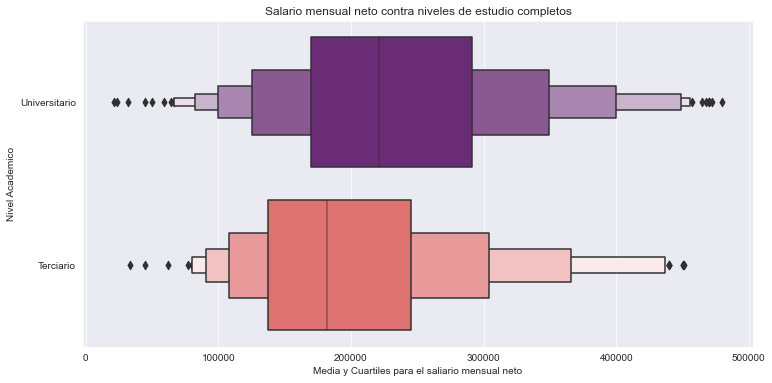

In [62]:
plt.figure(figsize=(12, 6))
ax = sns.boxenplot(
    data=df_Uni_o_Ter_Comp,
    x="salary_monthly_NETO",
    y="profile_studies_level",
    palette="magma",
)
ax.set(
    xlabel="Media y Cuartiles para el saliario mensual neto", ylabel="Nivel Academico"
)
ax.set_title("Salario mensual neto contra niveles de estudio completos")

In [63]:
print(
    df_Uni_o_Ter_Comp[df_Uni_o_Ter_Comp["profile_studies_level"] == "Terciario"][
        "salary_monthly_NETO"
    ].mean()
)
print(
    df_Uni_o_Ter_Comp[df_Uni_o_Ter_Comp["profile_studies_level"] == "Universitario"][
        "salary_monthly_NETO"
    ].mean()
)

198994.92596385544
233313.56060737526


Se puede ver que la observacion anterior se mantiene pero las medias aumentas esto puede deberse directamente a que tenemos una tendencia de aumento del salario con respecto a acabar un nivel academico. 

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


Realizamos varios graficos, para ver cuales pueden servir y cuales no.


**Salario Neto vs Años de Experiencia Laboral, usando como variable categoria la satisfaccion respecto al salario** \
Es una visualizacion util porque se pueden distinguir tendencias a simple vista.


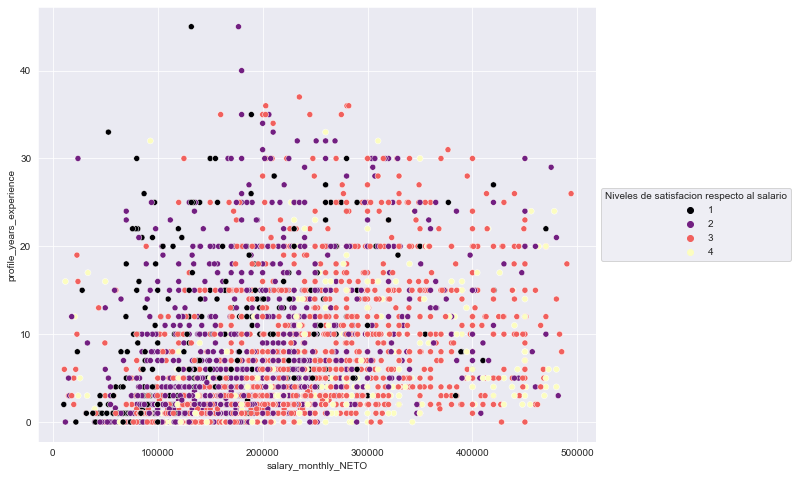

In [64]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="salary_monthly_NETO",
    y="profile_years_experience",
    hue="salary_satisfaction",
    palette="magma",
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# ax.set(xlabel='Salario mensual neto', ylabel='Cantidad')
# ax.set_title('Salario mensual neto contra niveles de estudio')
ax.get_legend().set_title("Niveles de satisfacion respecto al salario")

**Salario Neto vs Años de Experiencia Laboral, usando como variable categorica la provincia de trabajo**\
No es una visualizacion util ya que son demasiadas provincias y no se puede distinguir claramente el grafico.

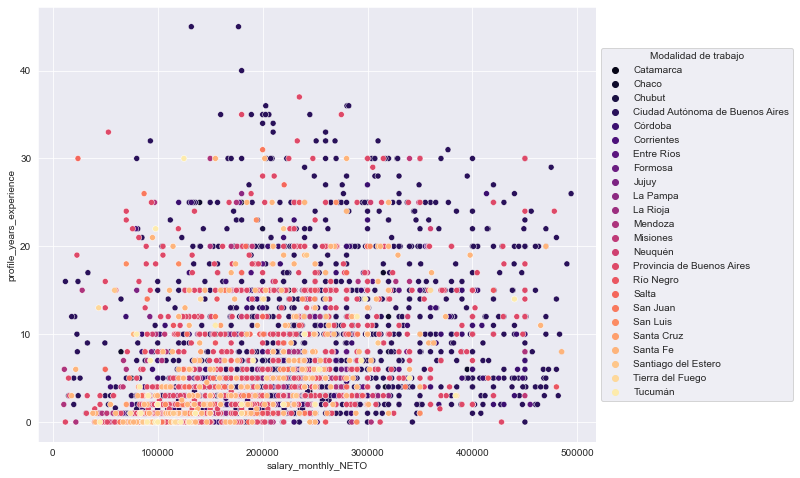

In [65]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="salary_monthly_NETO",
    y="profile_years_experience",
    hue="work_province",
    palette="magma",
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# ax.set(xlabel='Salario mensual neto', ylabel='Cantidad')
# ax.set_title('Salario mensual neto contra niveles de estudio')
ax.get_legend().set_title("Modalidad de trabajo")

**Salario Neto vs Años de Experiencia Laboral, utilizando como variable categorica la modalidad de trabajo**\
Es una buena visualizacion.

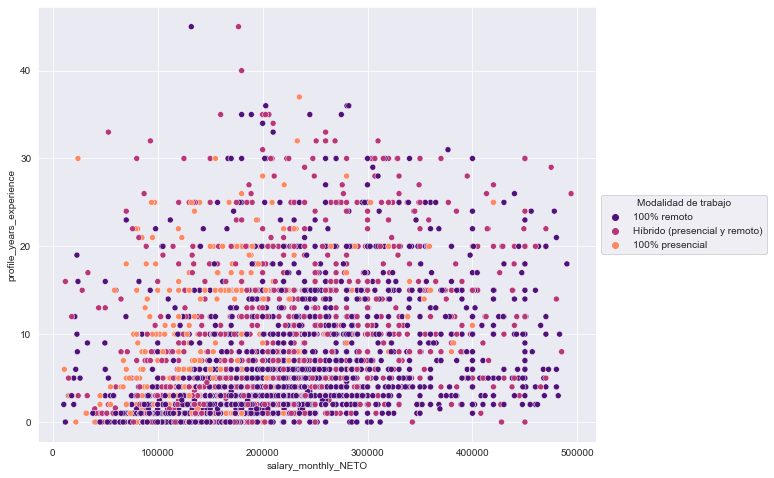

In [66]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="salary_monthly_NETO",
    y="profile_years_experience",
    hue="work_work_modality",
    palette="magma",
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# ax.set(xlabel='Salario mensual neto', ylabel='Cantidad')
# ax.set_title('Salario mensual neto contra niveles de estudio')
ax.get_legend().set_title("Modalidad de trabajo")

**Salario Neto vs Edad, usando como variable categorica la modalidad de trabajo**\
Es una visualizacion util.

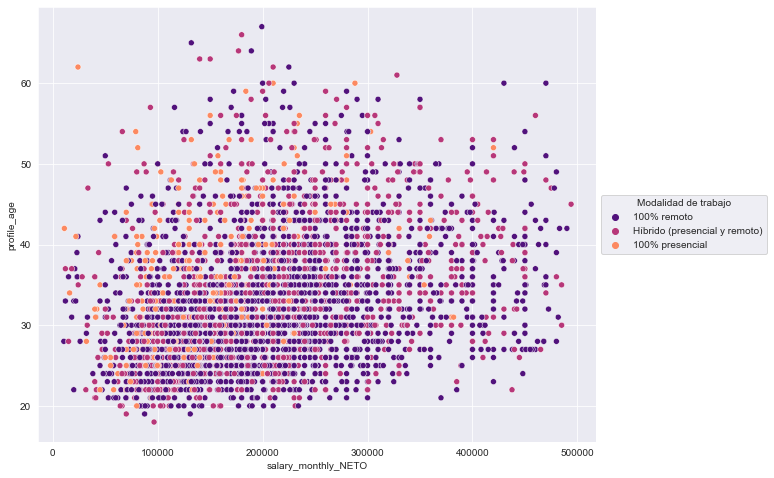

In [67]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="salary_monthly_NETO",
    y="profile_age",
    hue="work_work_modality",
    palette="magma",
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# ax.set(xlabel='Salario mensual neto', ylabel='Cantidad')
# ax.set_title('Salario mensual neto contra niveles de estudio')
ax.get_legend().set_title("Modalidad de trabajo")

**Salario Neto vs Años de Experiencia Laboral, usando como variable categoria el genero**

No es una buena visualizacion porque no hay demasiados datos para las diversidades.

In [68]:
df.loc[:, "profile_g"] = df.profile_gender.replace(
    {
        "Varón Cis": "Varón cis",
        "Mujer": "Mujer cis",
        "Mujer Cis": "Mujer cis",
        "Femenino": "Mujer cis",
        "mujer": "Mujer cis",
        "Mujer": "Mujer cis",
        "Queer": "Diversidades",
        "Varón Trans": "Diversidades",
        "No binarie": "Diversidades",
        "Mujer Trans": "Diversidades",
        "Fluido": "Diversidades",
        "Bigénero": "Diversidades",
        "Gay": "Diversidades",
    }
).fillna(False)

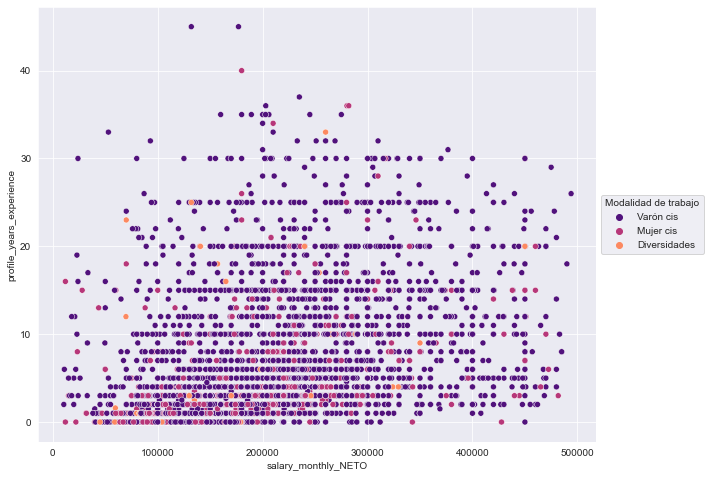

In [69]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(
    data=df,
    x="salary_monthly_NETO",
    y="profile_years_experience",
    hue="profile_g",
    palette="magma",
)
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
# ax.set(xlabel='Salario mensual neto', ylabel='Cantidad')
# ax.set_title('Salario mensual neto contra niveles de estudio')
ax.get_legend().set_title("Modalidad de trabajo")